## TensorFlow - Create simple neural network for Classification

## Program with Tensorflow

Simple classification task.

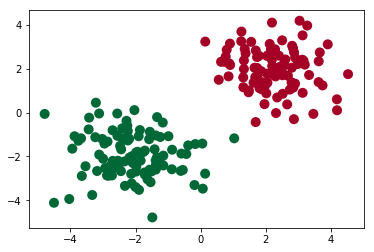

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(2*n_data, 1)      # class0 x shape=(100, 2)
y0 = np.zeros(100)                      # class0 y shape=(100, 1)

x1 = np.random.normal(-2*n_data, 1)     # class1 x shape=(100, 2)
y1 = np.ones(100)                       # class1 y shape=(100, 1)
x = np.vstack((x0, x1))  # shape (200, 2) + some noise
y = np.hstack((y0, y1))  # shape (200, )

# plot data
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()


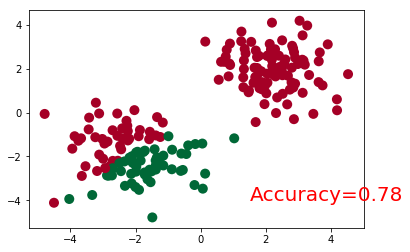

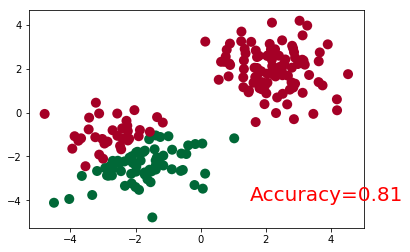

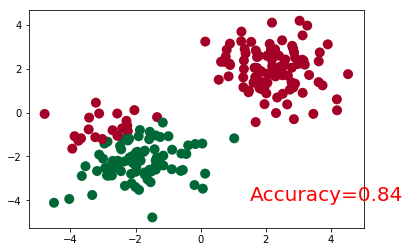

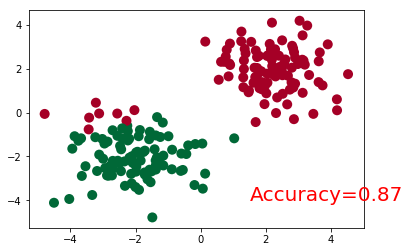

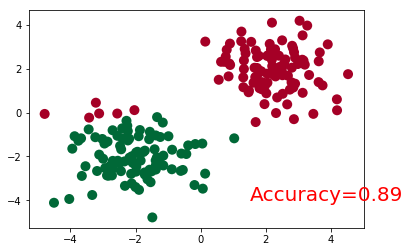

In [15]:
tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.int32, y.shape)     # input y

# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer 10 hidden nodes
output = tf.layers.dense(l1, 2)                     # output layer


loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)           # compute cost


accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

sess = tf.Session()                                                                 # control training and others
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)     # initialize var in graph

plt.ion()   # something about plotting
for step in range(10): 
    # train and net output
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    if step % 2 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()